In [1]:
import methylprep
import methylcheck
import methylize
import pandas as pd
from pathlib import Path

In [2]:
g69,meta = methylcheck.load_both('/Volumes/LEGX/SCS/GSE69238/')
meta = meta[ meta.Sample_ID.isin(g69.columns) ] # meta was larger than beta data
man = methylprep.Manifest('450k')
man_df = man.data_frame
g69pheno = [1 if x == 'Male' else 0 for x in meta.gender]
chromXY = man_df[man_df.CHR.isin(['1','22','23','X'])].index
g69sample = g69[ g69.index.isin( chromXY ) ]
print(f"{g69.shape} --> {g69sample.shape} | pheno: {len(g69pheno)}")
g69stats = methylize.diff_meth_pos(g69sample, g69pheno)
created = methylize.diff_meth_regions(g69stats, man, prefix='dmr')
print(created)

Files: 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]
INFO:methylcheck.load_processed:loaded data (485512, 173) from 1 pickled files (0.616s)
INFO:methylprep.files.manifests:Reading manifest file: HumanMethylation450k_15017482_v3.csv


(485512, 173) --> (66604, 173) | pheno: 173


  0%|          | 0/66604 [00:00<?, ?it/s]

Calculating ACF out to: 777
with 27 lags: [31, 61, 91 ... 661, 691, 721, 751, 781]
2992103 bases used as coverage for sidak correction
INFO:methylize.diff_meth_regions:wrote: dmr.regions-p.bed.gz, (regions with corrected-p < 0.05: 4615)
INFO:methylize.genome_browser:Loaded 5802 CpG regions from dmr_regions.csv.
INFO:methylize.genome_browser:Using cached `refGene`: /Users/mmaxmeister/methylize/methylize/data/refGene.pkl with (88923) genes
Mapping genes: 100%|██████████| 88923/88923 [00:54<00:00, 1643.37it/s]
INFO:methylize.genome_browser:Wrote dmr_regions_genes.csv


['dmr.args.txt', 'dmr.acf.txt', 'dmr.fdr.bed.gz', 'dmr.slk.bed.gz', 'dmr.regions-p.bed.gz', 'dmr_regions.csv', 'dmr_stats.csv', 'dmr_regions_genes.csv', 'dmr_dmp_stats.bed']


Total probes to plot: 66794
01 46837 | 02 16 | 03 6 | 04 10 | 05 12 | 06 17 | 07 14 | 08 6 | 09 2 | 10 6 | 11 5 | 12 6 | 13 6 | 14 1 | 15 3 | 16 9 | 17 10 | 18 3 | 19 23 | 20 5 | 21 3 | 22 8553 | X 11240 | Y 1


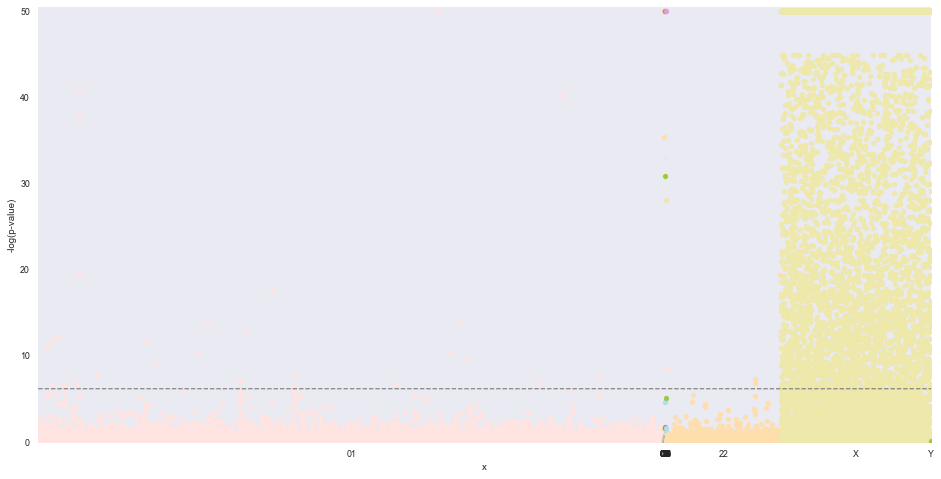

In [5]:
_fdr_ = pd.read_csv(kw['prefix'] + '.fdr.bed.gz', sep='\t').rename(columns=manhattan_cols).set_index('name')
methylize.manhattan_plot(_fdr_, manifest)

# list of genes associated with significant regions

In [15]:
DMR = pd.read_csv('dmr_regions_genes.csv').set_index('name').drop(columns=['Unnamed: 0']).sort_values('genes')
DMR[ ~DMR['genes'].isna() ].sort_values('z_p')

,chrom,chromStart,chromEnd,min_p,n_probes,z_p,z_sidak_p,genes,distances,descriptions
name,,,,,,,,,,
cg08881528,X,47233130,47233211,0.000000e+00,2,8.372000e-56,3.093000e-51,USP11,122,Homo sapiens ubiquitin specific peptidase 11 (...
cg04630982,X,139924180,139924292,0.000000e+00,2,1.366000e-51,3.649000e-47,MIR505,33,"Homo sapiens microRNA 505 (MIR505), microRNA. ..."
cg21990184,X,108732711,108732854,0.000000e+00,3,2.318000e-50,4.851000e-46,IRS4,215,Homo sapiens insulin receptor substrate 4 (IRS...
cg27584469,X,145817894,145817947,0.000000e+00,2,1.805000e-48,1.019000e-43,SLITRK2,66,| Homo sapiens SLIT and NTRK like family memb...
cg03766586,X,87517786,87517942,5.662000e-40,2,2.907000e-47,5.575000e-43,KLHL4,-15,Homo sapiens kelch like family member 4 (KLHL4...
...,...,...,...,...,...,...,...,...,...,...
cg17968718,X,11143346,11143396,4.697000e-02,1,6.908000e-03,1.000000e+00,ARHGAP6,-50,Homo sapiens Rho GTPase activating protein 6 (...
cg10520226,1,2894989,2895039,4.751000e-02,1,6.993000e-03,1.000000e+00,"BAG6,LINC01250","-58,149","| Homo sapiens BAG cochaperone 6 (BAG6), tran..."
cg05204193,X,30886263,30886313,4.878000e-02,1,7.182000e-03,1.000000e+00,LOC107985544,208,NaN
